In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Encoder

In [2]:
encoder_training_info = np.load('encoder_training_data_info.npy', allow_pickle=True).item()

In [3]:
from utils import DATASIZE2NUM, fit_powerlaw


def plot_datasize_vs_metric(
    meta_info,
    model_base,
    metric,
    dataset_list,
    color_list,
    sizes=['10M', '100M', '1B', '16B'],
    postprocess=np.min,
    stride=None,
    fit = True,
    fit_num = None,
    figsize=(8, 6),
    ylabel=None,
    yticks=None,
    minbias=0,
):
    
    fig, ax = plt.subplots(figsize=figsize,dpi=100)
    ax.set_xscale('log')
    
    minys = []
    maxys = []
    lines = []
    labels = []
    for dataset, colors in zip(dataset_list, color_list):
        
        xs = []
        ys = []
        for size in sizes:
            model_name = f'{model_base}_1B_{size}'
            if model_name not in meta_info.keys():
                continue
            x = DATASIZE2NUM[size]
            y = meta_info[model_name][dataset][metric][:, 1]
            
            y = postprocess(y)
            xs.append(x)
            ys.append(y)
        
        xs = np.array(xs)
        ys = np.array(ys)

        logys = np.log10(ys)

        ax.scatter(xs, logys, marker='o', c=colors[0], s=150)
        
        if dataset == 'lsf':
            prefix=r'OOD-LSF: '
        elif dataset == 'monash':
            prefix = r'OOD-Monash: '
        else:
            prefix = r'ID: '
            
        if fit:
            if fit_num is not None:
                xs_ = xs[:fit_num]
                ys_ = ys[:fit_num]
            else:
                xs_ = xs
                ys_ = ys
            logys_fit, label = fit_powerlaw(xs_, ys_, signal='D')
            
            line, =  ax.plot(xs_, logys_fit, c=colors[1], linestyle='--', label=prefix + label, linewidth=4)
            lines.append(line)
            labels.append(label)
        
        minys.append(np.min(ys))
        maxys.append(np.max(ys))
    
    miny, maxy = min(minys), max(maxys)
    if stride is not None:
        pass
    elif maxy - miny < 0.5:
        stride = 0.1
    elif maxy - miny < 1:
        stride = 0.2
    elif maxy - miny < 10:
        stride = 1
    elif maxy - miny < 100:
        stride = 10
    elif maxy - miny < 1000:
        stride = 100
    else:
        stride = 1000
    
    yticks = np.arange(miny-minbias, maxy+stride, stride) if yticks is None else yticks
    
    ax.set_yticks(np.log10(yticks), [f'{yt:.1f}' for yt in yticks])
    
    ax.set_xlabel('Dataset Size')
    
    ylabel = metric if ylabel is None else ylabel
    ax.set_ylabel(ylabel)
    
    ax.legend(loc='lower left', borderaxespad=0.1, ncol=1, frameon=True)
    
    ax.grid(which='both', axis='y', linestyle='--', linewidth=0.5)
    for xtick in [10**i for i in range(7,11)]:
        ax.axvline(x=xtick, color='gray', linestyle='--', linewidth=0.5)

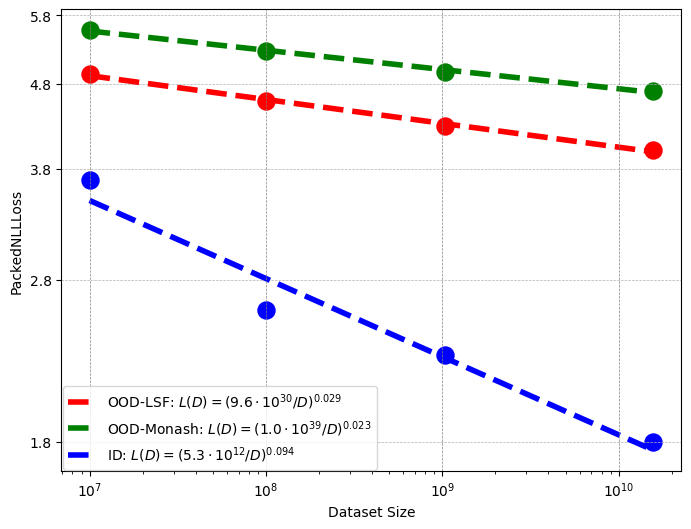

In [4]:
plot_datasize_vs_metric(
    encoder_training_info,
    'encoder',
    'PackedNLLLoss',
    ['lsf', 'monash', 'val'],
    [['red', 'red'], ['green', 'green'], ['blue', 'blue']],
)

# Decoder

In [5]:
decoder_training_info = np.load('decoder_training_data_info.npy', allow_pickle=True).item()

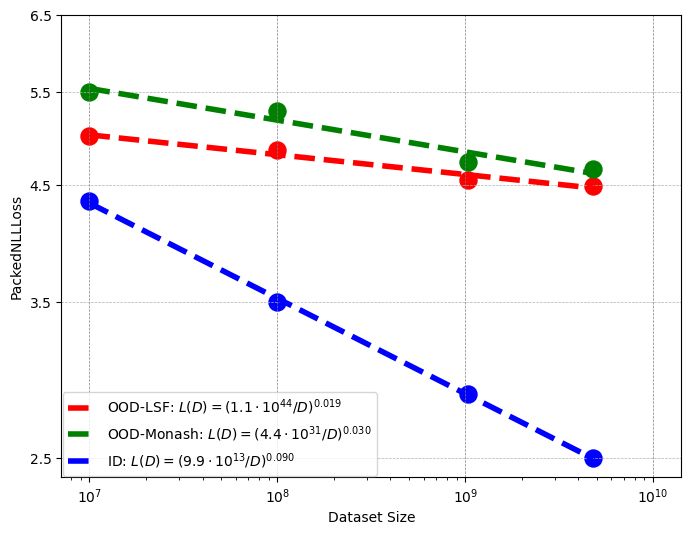

In [6]:

plot_datasize_vs_metric(
    decoder_training_info,
    'decoder',
    'PackedNLLLoss',
    ['lsf', 'monash', 'val'],
    [['red', 'red'], ['green', 'green'], ['blue', 'blue']],
    sizes=['10M', '100M', '1B', '5B'],
)